In [1]:
import pandas as pd

In [2]:
#import data
data = pd.read_csv('./Weight120230601-191707acc.data',header=None)
data.head()

,0,1,2,3
0,1685618227601,{x : -0.018,y : -0.024,z : -0.994}
1,1685618227609,{x : -0.016,y : -0.024,z : -1.002}
2,1685618227624,{x : -0.017,y : -0.026,z : -1.001}
3,1685618227638,{x : -0.020,y : -0.028,z : -1.000}
4,1685618227646,{x : -0.017,y : -0.025,z : -1.001}


In [3]:
#only looking at the z axis right now
data = data.drop([1,2],axis=1)
data.head()

,0,3
0,1685618227601,z : -0.994}
1,1685618227609,z : -1.002}
2,1685618227624,z : -1.001}
3,1685618227638,z : -1.000}
4,1685618227646,z : -1.001}


In [4]:
# parse the acceleration
def parse_acc(acc):
    res = acc[4:]
    res = res[:-1]
    return float(res)

In [5]:
parse_acc('z : -1.003}')

-1.003

In [6]:
data[3] = data[3].apply(parse_acc)
data.head()

,0,3
0,1685618227601,-0.994
1,1685618227609,-1.002
2,1685618227624,-1.001
3,1685618227638,-1.000
4,1685618227646,-1.001


In [7]:
# Converting epoch time to datetime
import numpy as np

# ms because the unix time from the sensor is in milliseconds
def to_datetime(unix_time):
    return np.datetime64(unix_time, "ms")

data[0] = data[0].apply(to_datetime)
data.head()

,0,3
0,2023-06-01 11:17:07.601,-0.994
1,2023-06-01 11:17:07.609,-1.002
2,2023-06-01 11:17:07.624,-1.001
3,2023-06-01 11:17:07.638,-1.000
4,2023-06-01 11:17:07.646,-1.001


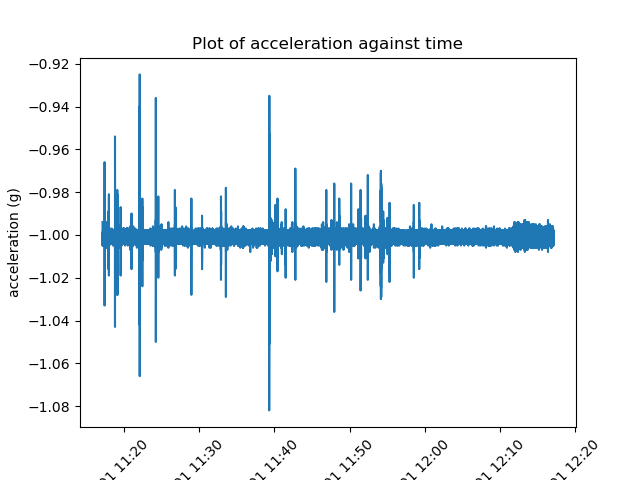

In [8]:
# Importing required library for zooming
from mpl_interactions import ioff, panhandler, zoom_factory
# plot
import matplotlib.pyplot as plt
%matplotlib widget
# Enable scroll to zoom with the help of MPL
# Interactions library function like ioff and zoom_factory.
with plt.ioff():
    figure, axis = plt.subplots()
plt.plot(data[0],data[3])
plt.xlabel('time')
plt.ylabel('acceleration (g)')
plt.title('Plot of acceleration against time')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(figure)
display(figure.canvas)
# This part doesn't work properly with pycharm. please open jupyter

In [9]:
# import pandas as pd

# def moving_std_by_time(df, time_window):
    
#     df['moving_std'] = df[3].rolling(window=time_window).std()
#     return df

# # Assuming your DataFrame is called 'df' and the datetime column is called 0
# data['datetime'] = pd.to_datetime(data[0])  # Convert datetime column to datetime dtype
# data = data.set_index('datetime')  # Set datetime column as index

# # Specify the time window size, for example '1 day'
# time_window = '5T'

# result_df = moving_std_by_time(data, time_window)

# result_df

import pandas as pd

def moving_std_by_time(data, time_window):
    # Convert the time window to a Timedelta object
    window_size = pd.Timedelta(time_window)
    
    # Find the index of the first point plus the time window
    first_valid_index = data.index[0] + window_size
    
    # Calculate the number of rows corresponding to the time window after the first point
    window_frames = (data.index >= first_valid_index).argmax()
    
    data['moving_std'] = data[3].rolling(window=time_window, min_periods=window_frames).std()
    return data

# Assuming your DataFrame is called 'data' and the datetime column is called 0
data['datetime'] = pd.to_datetime(data[0])  # Convert datetime column to datetime dtype
data = data.set_index('datetime')  # Set datetime column as index

# Specify the time window size, for example '10T'
time_window = '5T'

result_df = moving_std_by_time(data, time_window)

result_df

,0,3,moving_std
datetime,,,
2023-06-01 11:17:07.601,2023-06-01 11:17:07.601,-0.994,NaN
2023-06-01 11:17:07.609,2023-06-01 11:17:07.609,-1.002,NaN
2023-06-01 11:17:07.624,2023-06-01 11:17:07.624,-1.001,NaN
2023-06-01 11:17:07.638,2023-06-01 11:17:07.638,-1.000,NaN
2023-06-01 11:17:07.646,2023-06-01 11:17:07.646,-1.001,NaN
...,...,...,...
2023-06-01 12:17:07.604,2023-06-01 12:17:07.604,-1.000,0.001627
2023-06-01 12:17:07.605,2023-06-01 12:17:07.605,-1.001,0.001627
2023-06-01 12:17:07.619,2023-06-01 12:17:07.619,-1.002,0.001627


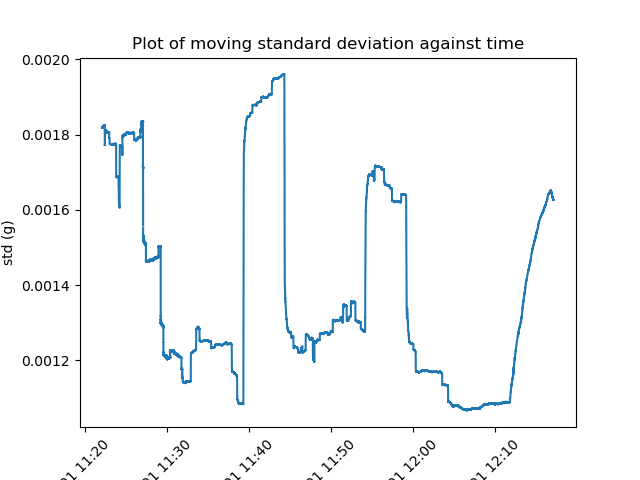

In [10]:
%matplotlib widget
# Enable scroll to zoom with the help of MPL
# Interactions library function like ioff and zoom_factory.
with plt.ioff():
    figure, axis = plt.subplots()
plt.plot(result_df[0],result_df["moving_std"])
plt.xlabel('time')
plt.ylabel('std (g)')
plt.title('Plot of moving standard deviation against time')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(figure)
display(figure.canvas)
# This part doesn't work properly with pycharm. please open jupyter